# Visualizing other datasets

이번 실습에서는 GPU를 사용합니다.

상단의 "런타임" -> "런타임 유형 변경" -> "하드웨어 가속기" 가 "GPU" 로 설정되도록 변경하고 진행하도록 하겠습니다.

## Scikit Learn Tutorial

https://colab.research.google.com/drive/1RbshhL20QRibt6aatSsK8pJZJt-72yIg 

## 1.1 Fashion-MNIST

Fashion-MNIST는 28 x 28 pixel 의 패션(옷) 이미지로 구성되어있습니다. 
각각의 이미지는 28 x 28 pixel들을 가지고 있기 때문에 우리는 $28 \times 28 = 784$ 차원의 벡터를 가지게 됩니다.

우선, 데이터를 불러와서 이미지를 확인해 보겠습니다. 

먼저 불러온 데이터를 이미지와 그 옷이 무엇인지를 알려주는 label로 나눠주겠습니다. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('fashion-mnist', cache=False) # MNIST-784 -> fashion-mnist (더 많은 데이터셋 종류는 https://openml.org/ 에서 찾아보실 수 있습니다.)


KeyboardInterrupt: 

In [ ]:
X = mnist.data.astype('float32').to_numpy()
y = mnist.target.astype('int64').to_numpy()

class_labels = {
0 : 'T-shirt/top',
1 : 'Trouser',
2 : 'Pullover',
3 : 'Dress',
4 : 'Coat',
5 : 'Sandal',
6 : 'Shirt',
7 : 'Sneaker',
8 : 'Bag',
9 : 'Ankel boot'
}

이제 이미지 하나를 선택해서 보겠습니다. 

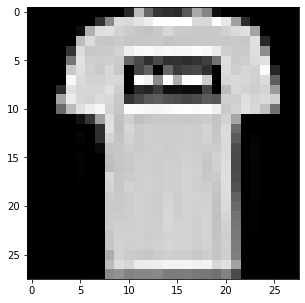

label : 0 - T-shirt/top


In [ ]:
plt.figure(figsize=(5,5))
idx = 1 # idx 숫자를 바꿔가며 여러 이미지를 확인해보세요!

grid_data = X[idx].reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap='gray')
plt.show()

print('label : {} - {}'.format(y[idx], class_labels[y[idx]]))

## 1.2 2D Visualization using PCA

PCA 는 Principal Components Analysis 의 약자로, 데이터가 가장 흩어져있는 축을 찾아서 그곳으로 사영해서 원하는 차원 개수만큼 줄이는 방법입니다. 

데이터가 가장 흩어져있는 축이라는 말은 가장 variance 가 커지게 하는 축이라는 말과 같습니다. 

PCA를 scikit-learn 패키지를 활용해서 나타내면서 이해해보도록 하겠습니다. 

### 1.2.1 PCA using Scikit-Learn

Fashion MNIST의 데이터 70000개를 모두 사용해보도록 하겠습니다.

In [ ]:
labels = y
data = X

print("the shape of sample data = ", data.shape)

the shape of sample data =  (70000, 784)


In [ ]:
X[0]

그리고 feature의 크기가 크기 때문에 z-score 정규화를 시켜주겠습니다. Sklearn 패키지 안의 StandardScaler 함수를 통해서 진행하겠습니다. 

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(70000, 784)


In [ ]:
standardized_data[0]

In [ ]:
sample_data = standardized_data

이제 scikit-learn 안의 PCA 패키지를 가져와서 적용해보도록 하겠습니다. 

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()

2차원 축소를 진행해보도록 하겠습니다.

In [ ]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data) 

print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (70000, 2)


원래 우리가 가지고 있던 데이터는 784차원이었는데 PCA를 통해서 2로 줄어든 것을 확인할 수 있습니다. 

이제 이것을 시각화해서 보도록 하겠습니다. 라벨마다 색을 부여해서 시각화하겠습니다. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


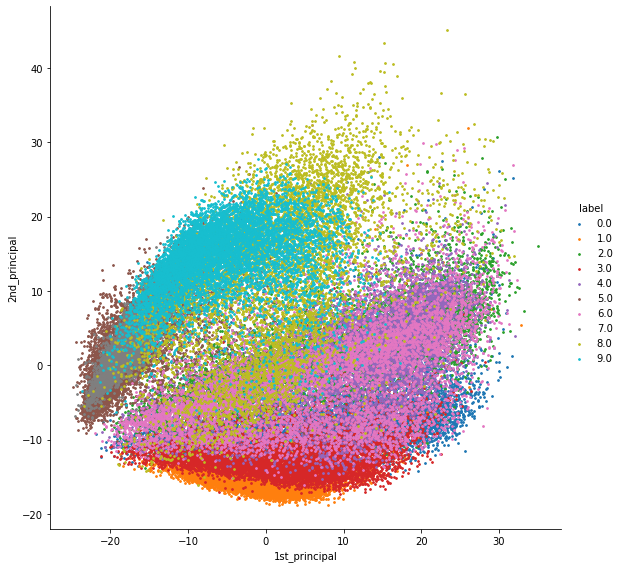

In [ ]:
import seaborn as sn
pca_data = np.vstack((pca_data.T, labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

scatter_ = lambda x,y,**kwargs: plt.scatter(x,y, s=3,**kwargs)
sn.FacetGrid(pca_df, hue="label", size=8).map(scatter_, '1st_principal', '2nd_principal').add_legend()
plt.show()

이렇게 우리의 MNIST 데이터셋을 2D로 차원을 축소해서 시각화를 해보았습니다. 비슷한 라벨의 이미지들끼리 모여있는 것을 보아 잘 축소된 것을 알 수 있습니다. 


# 1.2.2 3D visualization
이번에는 2차원이 아닌 3차원으로 축소시켜보도록 하겠습니다.

우선, 실험에 앞서 3차원 플랏을 위한 라이브러리를 먼저 설치하겠습니다.

In [ ]:
# !pip install --upgrade pip
# pipenv install plotly # 3차원 플랏을 위한 파이썬 라이브러리입니다.

     |████████████████████████████████| 2.1 MB 5.7 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()

# 3차원으로 차원 축소를 진행할 예정입니다.
pca.n_components = 3
pca_data = pca.fit_transform(sample_data)

print("shape of pca_reduced.shape = ", pca_data.shape)


# attaching the label for each 3-d data point 
pca_data = np.vstack((pca_data.T, labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "3rd_principal", "label"))



shape of pca_reduced.shape =  (70000, 3)


In [ ]:
import plotly.express as px

pallete = sn.color_palette("tab10")
colors = [pallete[int(label)] for label in pca_df['label']]
fig = px.scatter_3d(pca_df,x='1st_principal',y='2nd_principal',z='3rd_principal', color='label', opacity=0.7)
fig.update_traces(marker_size = 1)

fig.show()

# 마우스 휠로 확대 및 축소, 마우스 드래그를 통한 화면 이동이 가능합니다.

# 2.1 CIFAR-10 데이터를 차원 축소 해보기

이번에는 컬러 이미지를 차원 축소해볼까요?

이번에 사용할 데이터는 CIFAR-10 데이터셋입니다.
이 데이터셋은 $32 \times 32$ pixel로 이루어져있는 컬러 이미지셋으로, 10개의 클래스로 구분되어있습니다.

컬러이미지이므로 RGB 3개 채널을 가지고 있어서 $32 \times 32 \times 3 = 3072$ 차원의 벡터가 됩니다.
MNIST 보다도 훨씬 큰 차원의 벡터로 나타나므로, dimension reduction 적용 시에도 구분이 잘 되기가 훨씬 어렵습니다!

과연 잘 분류될 지 직접 확인해봅시다.

In [ ]:
# 데이터셋 다운로드에 3분정도 소요됩니다.
cifar = fetch_openml('CIFAR_10', cache=False) # CIFAR-10 데이터셋 (더 많은 데이터셋 종류는 https://openml.org/ 에서 찾아보실 수 있습니다.)

In [ ]:
X = cifar.data.astype('float32').to_numpy()
y = cifar.target.astype('int64').to_numpy()

class_labels = {
0 : 'airplane',
1 : 'automobile',
2 : 'bird',
3 : 'cat',
4 : 'deer',
5 : 'dog',
6 : 'frog',
7 : 'horse',
8 : 'ship',
9 : 'truck'
}

다운로드한 이미지를 직접 그려봅시다!

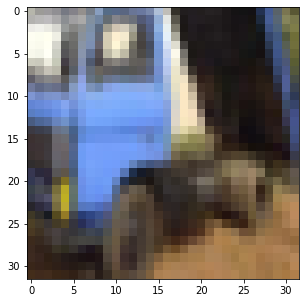

label : 9 - truck


In [ ]:
from PIL import Image
plt.figure(figsize=(5,5))
idx = 4 # idx 값을 바꿔가면서 여러 이미지를 확인해보세요.

grid_data = Image.fromarray(X[idx].astype('uint8').reshape(3,32,32).transpose(1,2,0), )
plt.imshow(grid_data)
plt.show()

print('label : {} - {}'.format(y[idx], class_labels[y[idx]]))

PCA를 적용하기에 앞서, StandardScaler를 이용해 z-score normalization을 적용하도록 하겠습니다

In [ ]:
labels = y
data = X

print("the shape of sample data = ", data.shape)

the shape of sample data =  (60000, 3072)


In [ ]:
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(60000, 3072)


In [ ]:
sample_data = standardized_data

# 2.2 2D visualization
2차원 벡터로 dimension reduction을 진행해보도록 하겠습니다.

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()


pca.n_components = 2
pca_data = pca.fit_transform(sample_data).

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))



shape of pca_reduced.shape =  (60000, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



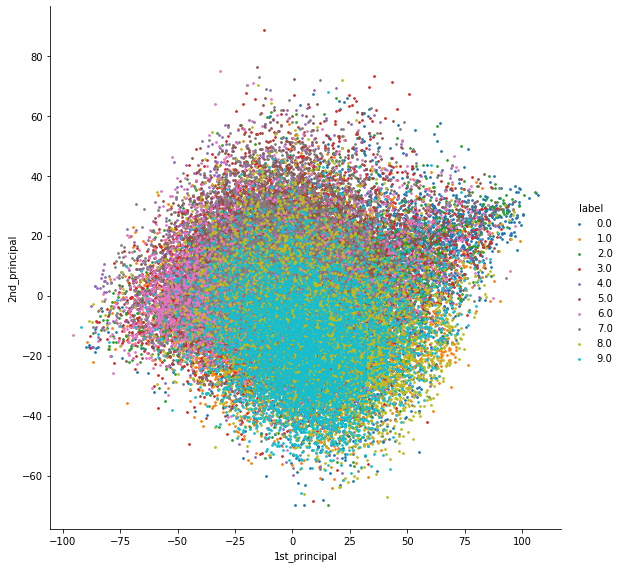

In [ ]:
# creating a new data fram which help us in ploting the result data
scatter_ = lambda x,y,**kwargs: plt.scatter(x,y, s=3,**kwargs)
sn.FacetGrid(pca_df, hue="label", size=8).map(scatter_, '1st_principal', '2nd_principal').add_legend()
plt.show()

# 2.3 3D visualization

3차원 데이터 축소를 진행해보겠습니다.

앞에서 사용한 코드와 동일한 코드를 통해 PCA를 진행합니다.

In [ ]:
pca = decomposition.PCA()

pca.n_components = 3
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 3-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


# attaching the label for each 3-d data point 
pca_data = np.vstack((pca_data.T, labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "3rd_principal", "label"))



shape of pca_reduced.shape =  (60000, 3)


3차원 플랏을 통해 잘 분류되었는지 확인해봅시다!

In [ ]:
pallete = sn.color_palette("tab10")
colors = [pallete[int(label)] for label in pca_df['label']]
fig = px.scatter_3d(pca_df,x='1st_principal',y='2nd_principal',z='3rd_principal', color='label', opacity=0.7)
fig.update_traces(marker_size = 1)

fig.show()

# 마우스 휠로 확대 및 축소, 마우스 드래그를 통한 화면 이동이 가능합니다.

# 잘 분류되었나요? 

고차원의 데이터일수록 단순한 기법으로 시각화하기가 어렵습니다.

이번엔 PCA가 아닌 t-SNE를 이용한 시각화를 진행해봅시다.

t-SNE는 PCA에 비해 굉장히 느립니다. 

이를 해결하기 위한 방법으로, GPU를 이용한 t-SNE가 구현되어있는 라이브러리를 사용하도록 하겠습니다. 



> !!! 주의: 상단의 "런타임" - "런타임 유형 변경" 에서 "하드웨어 가속기" 가 "GPU"로 설정되어있는지 확인합시다.



In [ ]:
!pip install tsnecuda==3.0.1+cu111 -f https://tsnecuda.isx.ai/tsnecuda_stable.html

Looking in links: https://tsnecuda.isx.ai/tsnecuda_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 MB 10.5 MB/s eta 0:00:00


# 2D 시각화

In [ ]:
from tsnecuda import TSNE

# t-SNE 역시 PCA와 비슷하게 사용 가능합니다. 하지만 학습이 필요하기 때문에 PCA에 비해 훨씬 긴 시간을 필요로 합니다.
tsne = TSNE(n_components=2, learning_rate=10)
tsne_data = tsne.fit_transform(sample_data)
print("shape of pca_reduced.shape = ", tsne_data.shape)


# attaching the label for each 2-d data point 
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("1st_axis", "2nd_axis", "label"))



shape of pca_reduced.shape =  (60000, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



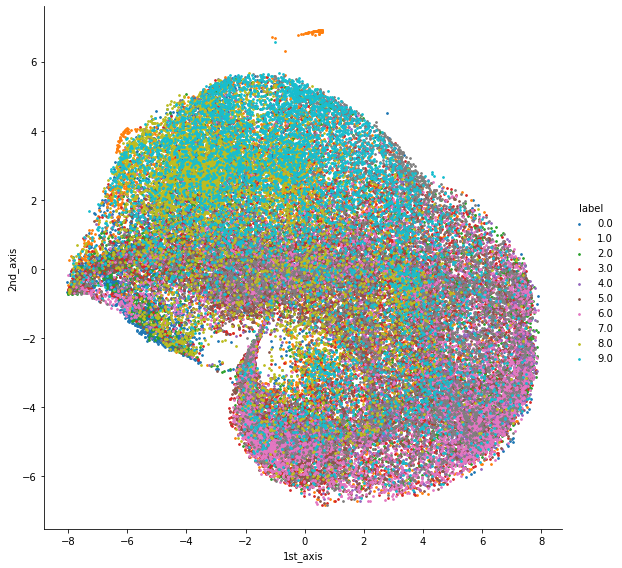

In [ ]:
scatter_ = lambda x,y,**kwargs: plt.scatter(x,y, s=3,**kwargs)
sn.FacetGrid(tsne_df, hue="label", size=8).map(scatter_, '1st_axis', '2nd_axis').add_legend()
plt.show()



# 오늘의 실습을 마치며

여기까지 우리가 인식하기 어려운 고차원의 데이터를 분석하기 쉽도록 차원을 줄여주는 기법인 dimension reduction에 대해 배워보았습니다. 

차원 축소는 고차원 데이터를 분석할 수 있게 해주는 도구로써, 오늘 배운 이미지 도메인 뿐 아니라 많은 분야의 데이터에 적용시킬 수 있으니 꼭 익혀두도록 합시다!